In [5]:
import pandas as pd
import numpy as np

In [6]:
# loading the movies dataset

In [7]:
movies=pd.read_csv("C:\\Users\\NAVYA\\Downloads\\movie_data\\movies.csv")

In [8]:
movies.shape # shape of the data set

(9742, 3)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
ratings=pd.read_csv("C:\\Users\\NAVYA\\Downloads\\movie_data\\ratings.csv")# loading the ratings dataset

In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
ratings.shape # shape of the dataset of ratings

(100836, 4)

## no of unique userids in ratings dataset

In [13]:
ratings['userId'].nunique()

610

## Which movie has recieved maximum number of user ratings?


In [14]:
ratings.groupby(['movieId'])['rating'].value_counts().sort_values(ascending=False)

movieId  rating
318      5.0       153
296      5.0       123
356      5.0       116
2571     5.0       109
260      5.0       104
                  ... 
5096     1.0         1
5095     4.5         1
5094     3.0         1
         1.5         1
193609   4.0         1
Name: rating, Length: 30417, dtype: int64

In [15]:
movies[movies['movieId']==318] # knowing the movie title

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [17]:
tags=pd.read_csv("C:\\Users\\NAVYA\\Downloads\\movie_data\\tags.csv")

In [18]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [19]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [20]:
df=pd.merge(movies,ratings,on='movieId',how='inner')

In [21]:
df.shape

(100836, 6)

## Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [22]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [23]:
tags[tags['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [24]:
movies[movies['title']=='Terminator 2: Judgment Day (1991)']# finding the movieId

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [25]:
ratings[ratings['movieId']==589]

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [26]:
ratings[ratings['movieId']==589]['rating'].mean()

3.970982142857143

In [27]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [28]:
df.groupby(['title','rating'])['rating'].count().sort_values(ascending=False)

title                                                   rating
Shawshank Redemption, The (1994)                        5.0       153
Pulp Fiction (1994)                                     5.0       123
Forrest Gump (1994)                                     5.0       116
Matrix, The (1999)                                      5.0       109
Star Wars: Episode IV - A New Hope (1977)               5.0       104
                                                                 ... 
In China They Eat Dogs (I Kina spiser de hunde) (1999)  4.0         1
In Bruges (2008)                                        2.5         1
In America (2002)                                       3.5         1
                                                        2.5         1
À nous la liberté (Freedom for Us) (1931)               1.0         1
Name: rating, Length: 30413, dtype: int64

## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [30]:
df[df['title']=='Fight Club (1999)']

,movieId,title,genres,userId,rating,timestamp
49835,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,5.0,964983282
49836,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4,2.0,945078528
49837,2959,Fight Club (1999),Action|Crime|Drama|Thriller,10,0.5,1455356582
49838,2959,Fight Club (1999),Action|Crime|Drama|Thriller,15,2.5,1510571747
49839,2959,Fight Club (1999),Action|Crime|Drama|Thriller,16,3.5,1377476874
...,...,...,...,...,...,...
50048,2959,Fight Club (1999),Action|Crime|Drama|Thriller,601,5.0,1441639461
50049,2959,Fight Club (1999),Action|Crime|Drama|Thriller,603,4.0,963176105
50050,2959,Fight Club (1999),Action|Crime|Drama|Thriller,606,5.0,1171231517
50051,2959,Fight Club (1999),Action|Crime|Drama|Thriller,608,5.0,1117336631


In [31]:
import seaborn  as sns
import matplotlib.pyplot as plt

In [32]:
df[df['title']=='Fight Club (1999)'].groupby('title')['rating'].value_counts()

title              rating
Fight Club (1999)  5.0       81
                   4.0       49
                   4.5       49
                   3.5       17
                   3.0       10
                   2.0        5
                   0.5        3
                   2.5        3
                   1.5        1
Name: rating, dtype: int64

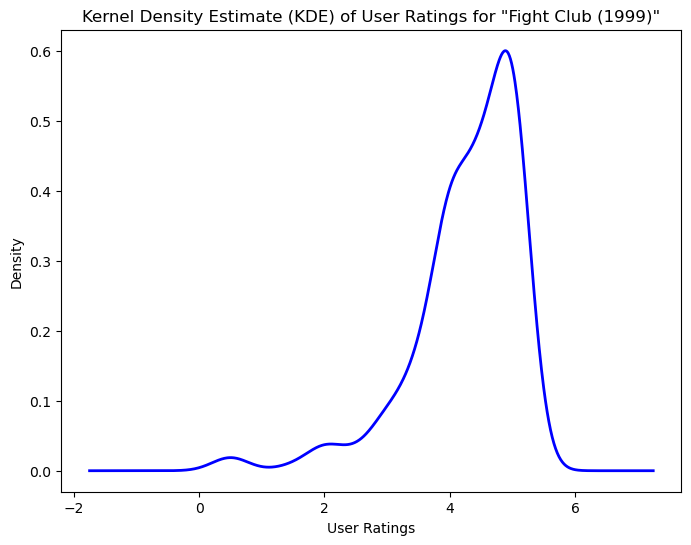

In [33]:
data = {'user_rating':list(df.loc[df['title']=='Fight Club (1999)','rating'])}
ratings_df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
ratings_df['user_rating'].plot(kind='kde', color='blue', linewidth=2)

#Add labels and title
plt.title('Kernel Density Estimate (KDE) of User Ratings for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Density')

plt.show()

In [34]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


## Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

## Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [35]:
g=df.groupby('movieId')['rating'].agg(['count','mean']).reset_index()

In [36]:
g

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [37]:
updated_movies=pd.merge(movies,g, on='movieId')

In [38]:
updated_movies.shape

(9724, 5)

In [39]:
updated_movies=updated_movies[updated_movies['count']>50]

In [40]:
updated_movies=updated_movies.rename(columns={'count':'no_of_rating','mean':'mean_ratings'})

In [41]:
updated_movies

,movieId,title,genres,no_of_rating,mean_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


## Which movie is the most popular based on  average user ratings?


In [42]:
updated_movies.groupby('title')['mean_ratings'].max().sort_values(ascending=False)

title
Shawshank Redemption, The (1994)                                               4.429022
Godfather, The (1972)                                                          4.289062
Fight Club (1999)                                                              4.272936
Cool Hand Luke (1967)                                                          4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.268041
                                                                                 ...   
Johnny Mnemonic (1995)                                                         2.679245
Judge Dredd (1995)                                                             2.669355
City Slickers II: The Legend of Curly's Gold (1994)                            2.645455
Coneheads (1993)                                                               2.420635
Wild Wild West (1999)                                                          2.207547
Name: mean_ratings, Length

In [43]:
updated_movies['no_of_rating'].sort_values(ascending=False)

314     329
277     317
257     307
510     279
1938    278
       ... 
3147     51
3490     51
3539     51
118      51
1235     51
Name: no_of_rating, Length: 436, dtype: int64

In [44]:
updated_movies[updated_movies['no_of_rating']==329]

,movieId,title,genres,no_of_rating,mean_ratings
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134


## which comes under top 5 popular movies based on number of user ratings.

In [47]:
updated_movies.sort_values(by=["no_of_rating"],ascending=False)

,movieId,title,genres,no_of_rating,mean_ratings
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [48]:
updated_movies['genres']=updated_movies['genres'].str.split('|')

In [49]:
updated_movies

,movieId,title,genres,no_of_rating,mean_ratings
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615
5,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078
6,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846
8358,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151
8457,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847


In [50]:
updated_movies[updated_movies['genres'].apply(lambda x: 'Sci-Fi' in x)].sort_values(by=["no_of_rating"],ascending=False)

,movieId,title,genres,no_of_rating,mean_ratings
1938,2571,"Matrix, The (1999)","[Action, Sci-Fi, Thriller]",278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",251,4.231076
418,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi, Thriller]",238,3.750000
507,589,Terminator 2: Judgment Day (1991),"[Action, Sci-Fi]",224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),"[Action, Adventure, Comedy, Sci-Fi]",54,3.833333
144,172,Johnny Mnemonic (1995),"[Action, Sci-Fi, Thriller]",53,2.679245
2028,2701,Wild Wild West (1999),"[Action, Comedy, Sci-Fi, Western]",53,2.207547
559,673,Space Jam (1996),"[Adventure, Animation, Children, Comedy, Fanta...",53,2.707547


## webscrapping

we already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. 

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [74]:
import requests
import numpy as np
from bs4 import BeautifulSoup 

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating  else np.nan

In [84]:
import requests
import numpy as np
from bs4 import BeautifulSoup 

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [75]:
links=pd.read_csv("C:\\Users\\NAVYA\\Downloads\\movie_data\\links.csv")

In [76]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [86]:
returnd = []

for i in range(20):
    a = scrapper(links["imdbId"][i])
    returnd.append(a)

In [87]:
returnd

['8.3',
 '7.1',
 '6.6',
 '6.0',
 '6.1',
 '8.3',
 '6.3',
 '5.5',
 '5.8',
 '7.2',
 '6.8',
 '5.8',
 '7.1',
 '7.1',
 '5.7',
 '8.2',
 '7.7',
 '6.7',
 '6.4',
 '5.7']

In [88]:
links["imdbId"][0]

114709

In [89]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [90]:
new=pd.merge(updated_movies,links,on='movieId')

In [91]:
new

,movieId,title,genres,no_of_rating,mean_ratings,imdbId,tmdbId
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,114709,862.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,113228,15602.0
3,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,113277,949.0
4,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,2015381,118340.0


In [93]:
new_rating=[]
for i in range(len(new)):
    a = scrapper(new["imdbId"][i])
    new_rating.append(a)

In [94]:
len(new_rating)

436

In [95]:
new['new_ratings']=new_rating

In [96]:
new

,movieId,title,genres,no_of_rating,mean_ratings,imdbId,tmdbId,new_ratings
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,2015381,118340.0,8.0


## Mention the movieId of the movie which has the highest IMDB rating.

In [97]:
new.sort_values(by='new_ratings',ascending=False)

,movieId,title,genres,no_of_rating,mean_ratings,imdbId,tmdbId,new_ratings
53,318,"Shawshank Redemption, The (1994)","[Crime, Drama]",317,4.429022,111161,278.0,9.3
117,858,"Godfather, The (1972)","[Crime, Drama]",192,4.289062,68646,238.0,9.2
146,1203,12 Angry Men (1957),[Drama],57,4.149123,50083,389.0,9.0
364,7153,"Lord of the Rings: The Return of the King, The...","[Action, Adventure, Drama, Fantasy]",185,4.118919,167260,122.0,9.0
156,1221,"Godfather: Part II, The (1974)","[Crime, Drama]",129,4.259690,71562,240.0,9.0
...,...,...,...,...,...,...,...,...
70,420,Beverly Hills Cop III (1994),"[Action, Comedy, Crime, Thriller]",59,2.720339,109254,306.0,5.5
28,153,Batman Forever (1995),"[Action, Adventure, Comedy, Crime]",137,2.916058,112462,414.0,5.4
73,435,Coneheads (1993),"[Comedy, Sci-Fi]",63,2.420635,106598,9612.0,5.4
30,160,Congo (1995),"[Action, Adventure, Mystery, Sci-Fi]",57,2.877193,112715,10329.0,5.3


## Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [98]:
new[new['genres'].apply(lambda x: 'Sci-Fi' in x)].sort_values(by=["new_ratings"],ascending=False)

,movieId,title,genres,no_of_rating,mean_ratings,imdbId,tmdbId,new_ratings
424,79132,Inception (2010),"[Action, Crime, Drama, Mystery, Sci-Fi, Thrill...",143,4.066434,1375666,27205.0,8.8
248,2571,"Matrix, The (1999)","[Action, Sci-Fi, Thriller]",278,4.192446,133093,603.0,8.7
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,816692,157336.0,8.7
140,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",211,4.215640,80684,1891.0,8.7
44,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",251,4.231076,76759,11.0,8.6
...,...,...,...,...,...,...,...,...
36,173,Judge Dredd (1995),"[Action, Crime, Sci-Fi]",62,2.669355,113492,9482.0,5.6
35,172,Johnny Mnemonic (1995),"[Action, Sci-Fi, Thriller]",53,2.679245,113481,9886.0,5.6
73,435,Coneheads (1993),"[Comedy, Sci-Fi]",63,2.420635,106598,9612.0,5.4
30,160,Congo (1995),"[Action, Adventure, Mystery, Sci-Fi]",57,2.877193,112715,10329.0,5.3
